In [ ]:
# PART 1: Portfolio Optimization via Risk Evaluation

# Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical $10,000 investment for the constructed portfolio.

# PART 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations

# To be continued in the second part!

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSVs as DataFrames
# Set the file paths
bk_data = Path("bk_data.csv")
fang_data = Path("fang_data.csv")
jnj_data = Path("jnj_data.csv")
luv_data = Path("luv_data.csv")
mu_data = Path("mu_data.csv")
nke_data = Path("nke_data.csv")
sbux_data = Path("sbux_data.csv")
t_data = Path("t_data.csv")
wdc_data = Path("wdc_data.csv")
wrk_data = Path("wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


In [3]:
# Combine DataFrames, Sort Index, and Rename Columns
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['BK', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,99.33,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,99.12,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,99.64,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,97.68,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


In [4]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


In [5]:
# Evaluate Riskiness of Stocks
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

JNJ     0.161208
T       0.187571
SBUX    0.206388
BK      0.225078
NKE     0.245942
LUV     0.280153
WRK     0.303048
FANG    0.370971
WDC     0.414714
MU      0.479754
dtype: float64

In [6]:
# Drop High Volatility Stocks
# Drop the five stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'JNJ', 'FANG', 'WRK'], inplace=True)
daily_returns.head()

,BK,LUV,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,0.004076,-0.009414,0.006703,0.011179
2015-06-26,0.003034,-0.004929,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.033217,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002712,0.003251,0.001214,-0.006989


In [7]:
# Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.004668
2015-06-26    0.005681
2015-06-29   -0.016436
2015-06-30   -0.002416
dtype: float64

In [8]:
# Calculate Cumulative Returns
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2015-06-24         NaN
2015-06-25    1.004668
2015-06-26    1.010376
2015-06-29    0.993769
2015-06-30    0.991368
dtype: float64

<AxesSubplot:xlabel='date'>

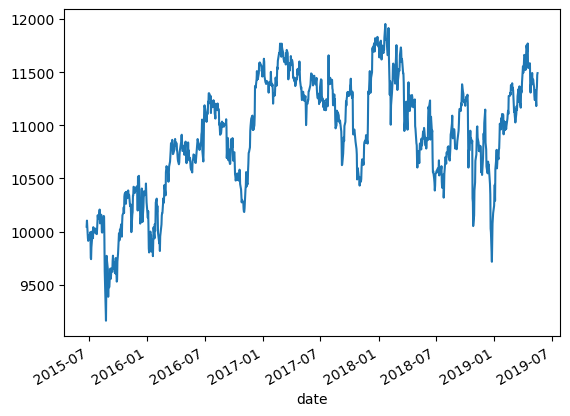

In [9]:
# Plot Return of Portfolio Starting with Initial Investment of $10,000
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()